# **Download the Data set From Kaggle**

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sathushanag","key":"24ed2c46bfc00c22f72898d93d683284"}'}

In [3]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# **Load the Data set**

In [4]:
!kaggle datasets download -d rishiksaisanthosh/brain-tumour-classification

Dataset URL: https://www.kaggle.com/datasets/rishiksaisanthosh/brain-tumour-classification
License(s): unknown


In [5]:
import zipfile

with zipfile.ZipFile("brain-tumour-classification.zip", "r") as zip_ref:
    zip_ref.extractall("brain-tumour-classification")

In [6]:
import os

dataset_path = "brain-tumour-classification/BrainTumor_1"
folders = os.listdir(dataset_path)
print("Folders in dataset:", folders)

Folders in dataset: ['Train', 'Test']


# **Data Preprocessing**

In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
IMAGE_SIZE = 100
BATCH_SIZE = 16

In [10]:
CHANNELS = 3
EPOCHS = 30

In [11]:
train_datasets=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain-tumour-classification/BrainTumor_1/Train',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 22848 files belonging to 4 classes.


In [12]:
test_datasets=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain-tumour-classification/BrainTumor_1/Test',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1311 files belonging to 4 classes.


## **Data Visualization**

In [13]:
train_len = len(train_datasets)
test_len = len(test_datasets)

In [14]:
print("Length of Train dataset:",train_len)
print("Length of Test dataset:",test_len)

Length of Train dataset: 1428
Length of Test dataset: 82


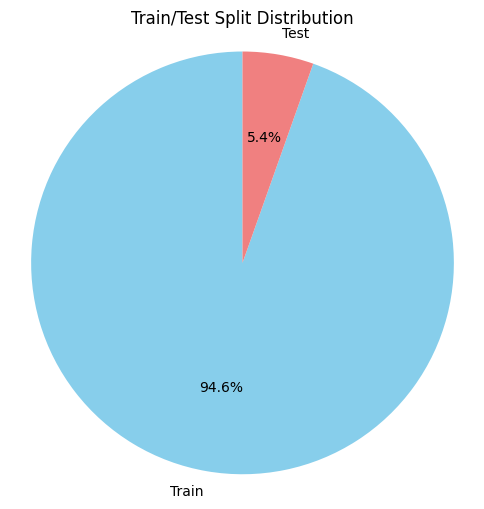

In [15]:
# Pie chart
labels = ['Train', 'Test']
sizes = [train_len, test_len]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Train/Test Split Distribution')
plt.axis('equal')
plt.show()

## **Seeing the class distribution in the train dataset**

In [16]:
class_names =train_datasets.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_class_distribution(dataset, title) -> None:
    class_names = dataset.class_names
    class_counts = [0] * len(class_names)

    for images, labels in dataset:
        labels = labels.numpy()
        for label in labels:
            class_counts[label] += 1


    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.title(f'Class Distribution in {title}')
    plt.axis('equal')
    plt.show()


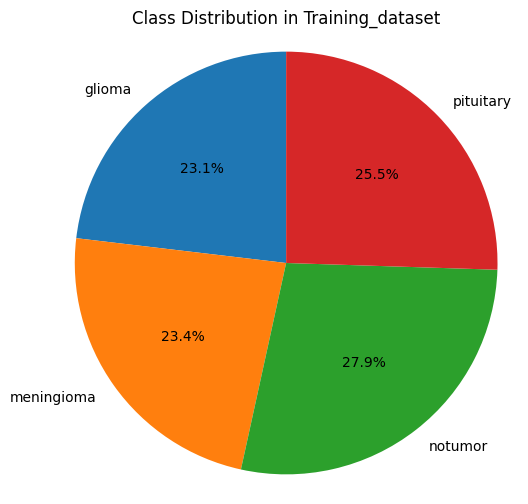

In [ ]:
show_class_distribution(train_datasets,'Training_dataset')

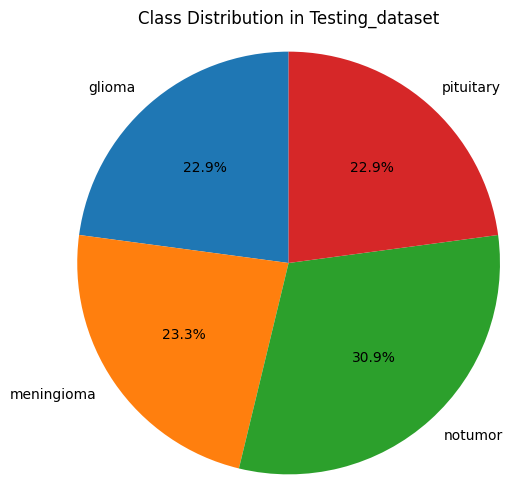

In [18]:
show_class_distribution(test_datasets,'Testing_dataset')

### **Visualize the data set**

In [19]:
for image_batch,label_batch in train_datasets.take(1):
  # print(image_batch[0].numpy())
  print(image_batch[0].shape)

(100, 100, 3)


In [20]:
def show_brain_tumor_images(dataset):
  plt.figure(figsize=(12,12))
  for image_batch,label_batch in dataset.take(1):
    for i in range(12):
      ax = plt.subplot(4,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(dataset.class_names[label_batch[i]])
      plt.axis("off")

#### **Training data**

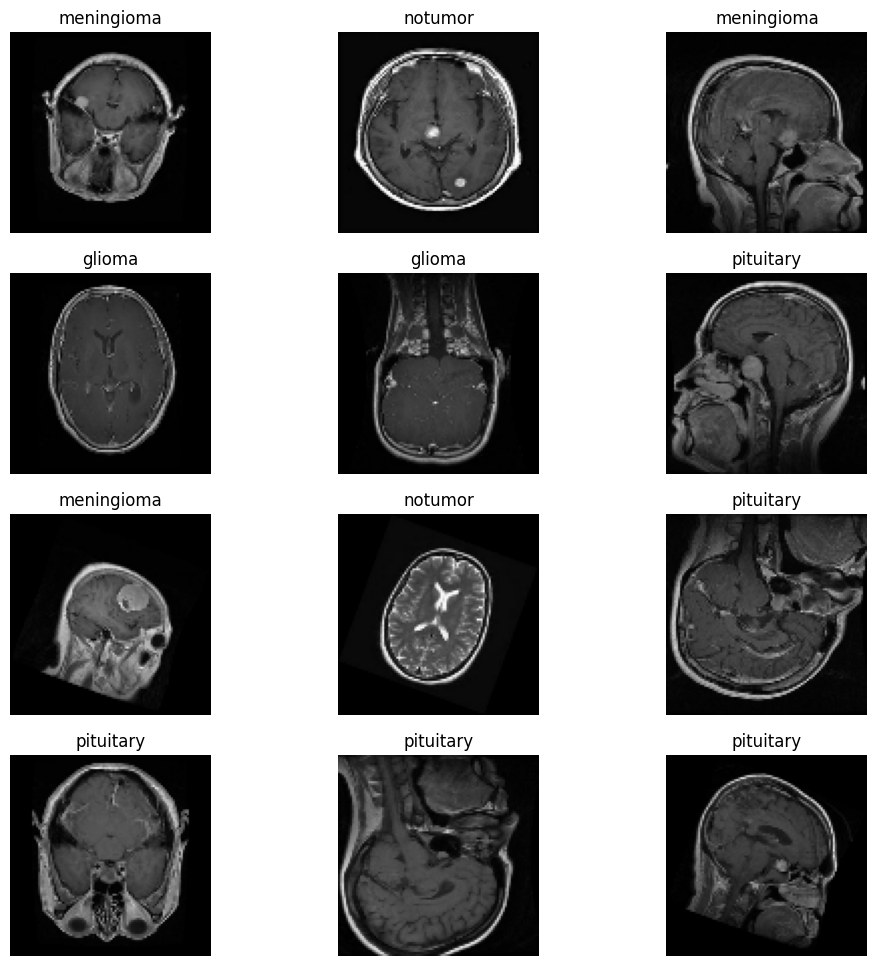

In [21]:
show_brain_tumor_images(train_datasets)

#### **Testing data**

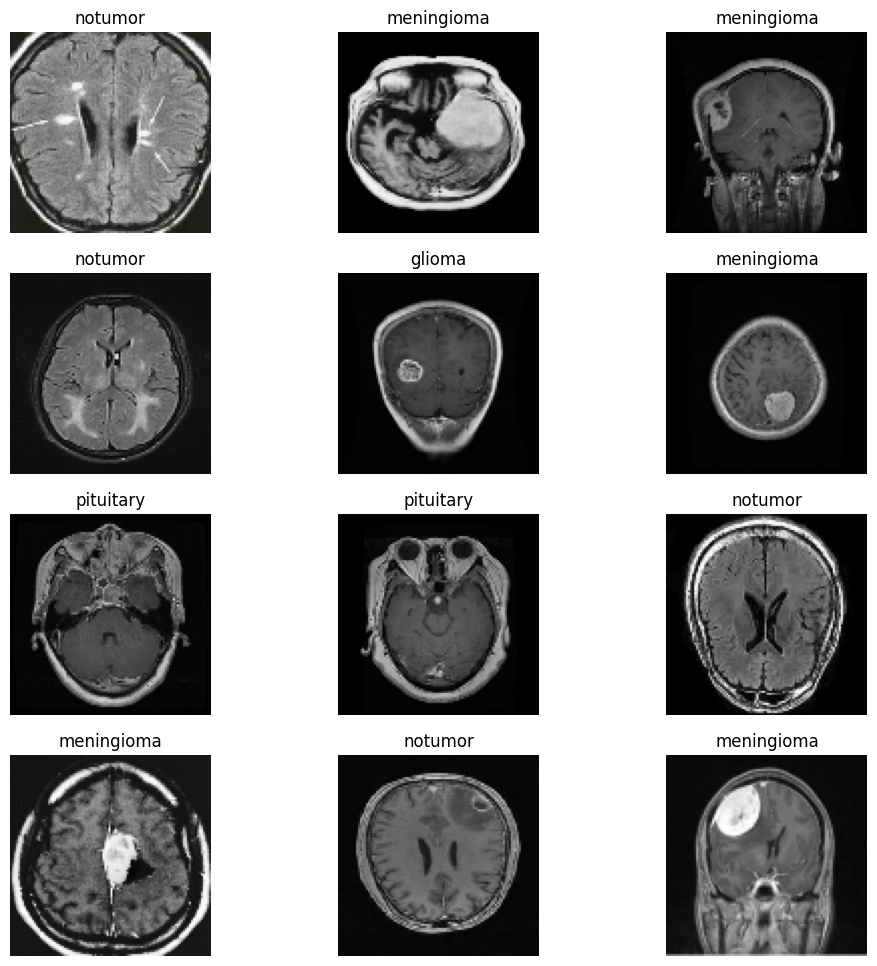

In [22]:
show_brain_tumor_images(test_datasets)

In [23]:
def get_dataset_partitions_tf(ds,val_split=0.5,shuffle=True,shuffle_size=1000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)


  val_size = int(ds_size*val_split)

  val_ds = ds.take(val_size)
  test_ds = ds.skip(val_size)

  return val_ds,test_ds

In [24]:
val_ds,test_ds = get_dataset_partitions_tf(train_datasets)
train_ds=train_datasets

In [25]:
len(test_ds),len(val_ds)

(714, 714)

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

In [28]:
data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1,fill_mode='nearest'),
    layers.RandomZoom(0.4),
    layers.RandomFlip('horizontal'),
    layers.RandomContrast(0.1),
    # layers.RandomBrightness(factor=(0.01,0.1))
])

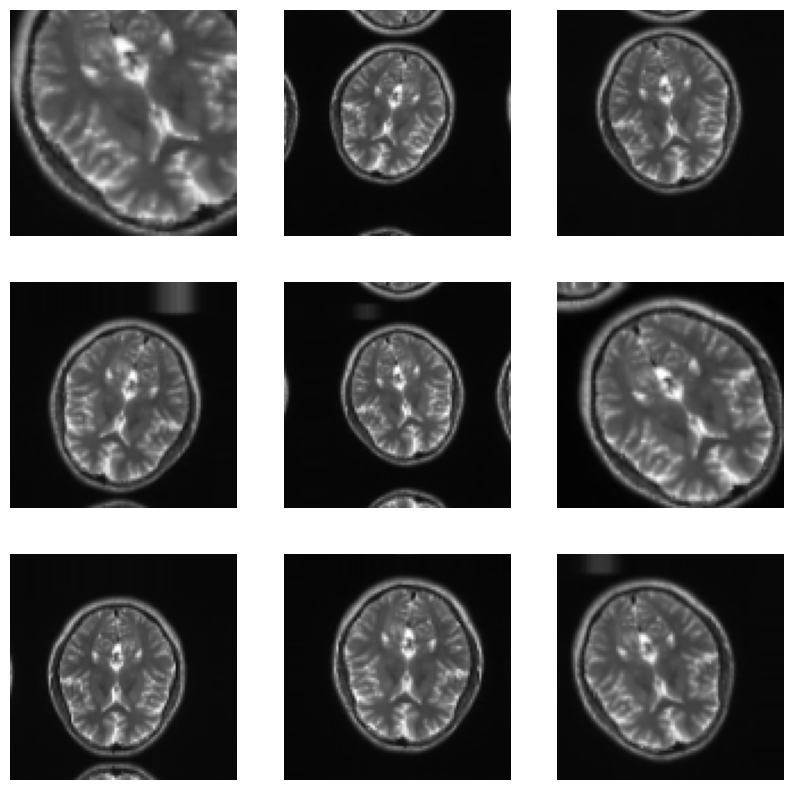

In [29]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augumentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# **Develop the CNN Model**

## **Load the Develop the CNN Model**

## **CNN Model**

In [30]:
cnn_model = tf.keras.models.load_model("/content/model_fine_cnn.h5")

## **VGG16**

In [37]:
vgg16_model = tf.keras.models.load_model("/content/model_vgg16.h5")

## **VGG 19**

In [38]:
vgg19_model = tf.keras.models.load_model("/content/vgg19_model.h5")

## **RestNet101**

In [47]:
restnet101_model = tf.keras.models.load_model("/content/restNet101_model.h5")

## **Develop the MobileNetv2 Model**

In [78]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 469.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: Operation cancelled by user


In [85]:
from tensorflow.keras.applications import MobileNetV2

In [86]:
IMG_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,3)

In [87]:
baseModel_mobilenetv2 = MobileNetV2(weights="imagenet",
                            include_top=False,
                            input_shape=IMG_SHAPE)

<ipython-input-87-1a2d3d1acbbf>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel_mobilenetv2 = MobileNetV2(weights="imagenet",


In [88]:
baseModel_mobilenetv2.trainable = False

In [91]:
shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

inputs = tf.keras.Input(shape= shape)
x = data_augumentation(inputs)
x = resize_and_rescale(x)
x = baseModel_mobilenetv2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(n_classes, activation='sigmoid')(x)

model_mobilenetv2 = tf.keras.Model(inputs, outputs)

In [92]:
model_mobilenetv2.summary()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [93]:
base_learning_rate = 0.00001
model_mobilenetv2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics= ['accuracy'])

In [94]:
history_mobilenetv2 = model_mobilenetv2.fit(train_ds,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    validation_data=val_ds)

Epoch 1/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.3546 - loss: 1.6939 - val_accuracy: 0.5744 - val_loss: 0.9987
Epoch 2/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.5366 - loss: 1.0952 - val_accuracy: 0.6175 - val_loss: 0.8973
Epoch 3/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.5981 - loss: 0.9660 - val_accuracy: 0.6351 - val_loss: 0.8624
Epoch 4/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.6240 - loss: 0.9024 - val_accuracy: 0.6525 - val_loss: 0.8346
Epoch 5/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.6487 - loss: 0.8552 - val_accuracy: 0.6625 - val_loss: 0.8168
Epoch 6/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.6673 - loss: 0.8189 - val_accuracy: 0.6602 - val_loss: 0.8266
Epoch 7/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.6932 - loss: 0.7773 - val_accuracy: 0.6657 - val_loss: 0.8177
Epoch 8/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6877 -

# **Fine Tune the Model**

In [98]:
baseModel_mobilenetv2.trainable = True

In [99]:
len(baseModel_mobilenetv2.layers)

154

In [100]:
fine_tune_at = 100

In [101]:
for layer in baseModel_mobilenetv2.layers[:fine_tune_at]:
  layer.trainable = False

In [102]:
initial_epoch = len(history_mobilenetv2.epoch)
fine_tune_epochs = 10

history_mobilev2net_finetune = model_mobilenetv2.fit(
    train_ds,
    epochs=EPOCHS + fine_tune_epochs,
    initial_epoch=initial_epoch,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds)

Epoch 31/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.7770 - loss: 0.5817 - val_accuracy: 0.7035 - val_loss: 0.7990
Epoch 32/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7725 - loss: 0.5748 - val_accuracy: 0.7036 - val_loss: 0.8060
Epoch 33/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.7788 - loss: 0.5679 - val_accuracy: 0.7121 - val_loss: 0.7826
Epoch 34/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.7758 - loss: 0.5823 - val_accuracy: 0.7022 - val_loss: 0.8149
Epoch 35/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7792 - loss: 0.5748 - val_accuracy: 0.7054 - val_loss: 0.8111
Epoch 36/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7793 - loss: 0.5680 - val_accuracy: 0.7104 - val_loss: 0.7962
Epoch 37/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.7804 - loss: 0.5712 - val_accuracy: 0.7134 - val_loss: 0.7881
Epoch 38/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 

In [105]:
model_mobilenetv2.save("model_mobilenetv2.h5")

# **Evaluate the Model**

## **CNN Model**

In [31]:
cnn_train_scores =cnn_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9006 - loss: 0.3194


In [35]:
cnn_val_scores = cnn_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9040 - loss: 0.3158


In [33]:
cnn_test_scores = cnn_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8990 - loss: 0.3250


In [34]:
cnn_train_scores

[0.3212951123714447, 0.9003851413726807]

## **VGG 16**

In [45]:
vgg16_train_scores = vgg16_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.6532 - loss: 0.9237


In [40]:
vgg16_val_scores = vgg16_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6639 - loss: 0.9121


In [46]:
vgg16_test_scores = vgg16_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6545 - loss: 0.9206


## **VGG 19**

In [42]:
vgg19_train_scores = vgg19_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.7368 - loss: 0.7343


In [43]:
vgg19_val_scores = vgg19_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.7320 - loss: 0.7637


In [44]:
vgg19_test_scores = vgg19_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7366 - loss: 0.7280


## **Rest Net101**

In [48]:
restnet101_train_scores = restnet101_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.5577 - loss: 1.1226


In [49]:
restnet101_val_scores = restnet101_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5588 - loss: 1.1195


In [50]:
restnet101_test_scores = restnet101_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.5588 - loss: 1.1199


## **Mobile Netv2 Model**

In [95]:
mobilenetv2_test_scores = model_mobilenetv2.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7002 - loss: 0.8355


In [96]:
acc_mobilenetv2 = history_mobilenetv2.history['accuracy']
val_acc_mobilenetv2 = history_mobilenetv2.history['val_accuracy']
loss_mobilenetv2 = history_mobilenetv2.history['loss']
val_loss_mobilenetv2 = history_mobilenetv2.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss for \n MobileNetV2')

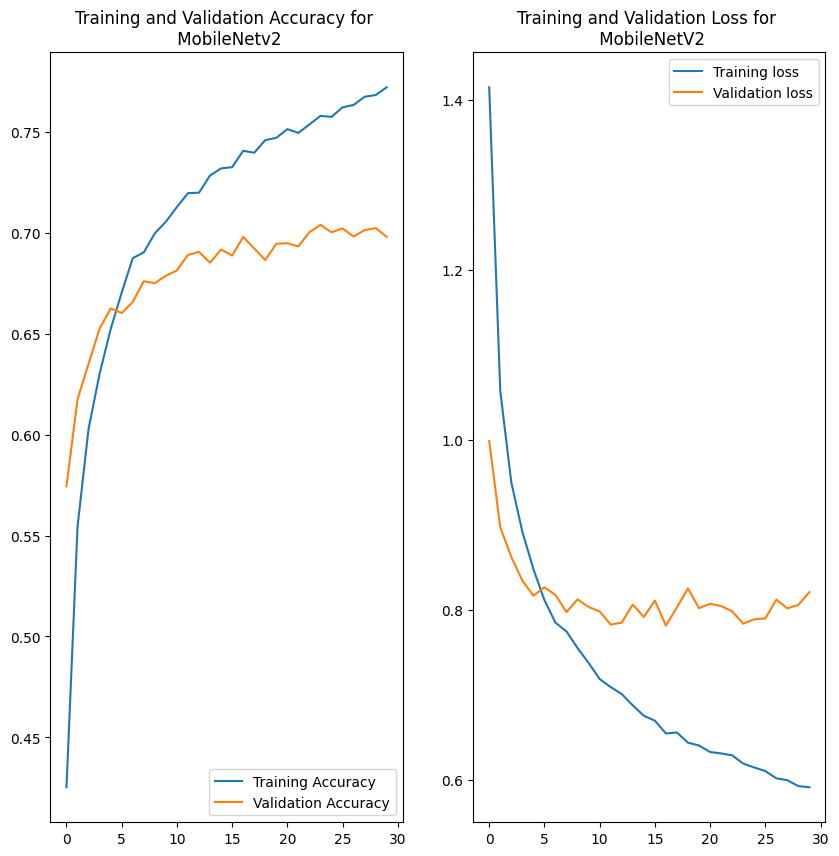

In [97]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc_mobilenetv2,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc_mobilenetv2,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for \n MobileNetv2')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss_mobilenetv2 ,label='Training loss')
plt.plot(range(EPOCHS),val_loss_mobilenetv2,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for \n MobileNetV2')

### **After fine tuning**

In [103]:
acc_mobilenetv2 += history_mobilev2net_finetune.history['accuracy']
val_acc_mobilenetv2 += history_mobilev2net_finetune.history['val_accuracy']
loss_mobilenetv2 += history_mobilev2net_finetune.history['loss']
val_loss_mobilenetv2 += history_mobilev2net_finetune.history['val_loss']

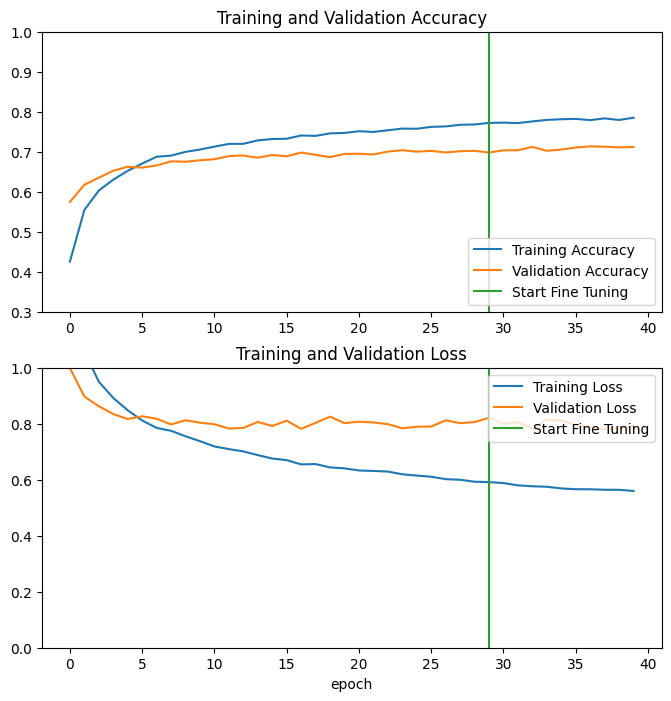

In [104]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_mobilenetv2, label='Training Accuracy')
plt.plot(val_acc_mobilenetv2, label='Validation Accuracy')
plt.ylim([0.3, 1])
plt.plot([initial_epoch-1,initial_epoch-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_mobilenetv2, label='Training Loss')
plt.plot(val_loss_mobilenetv2, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epoch-1,initial_epoch-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# **Analysis the Performance of the Model**

In [106]:
Custom_cnn = [cnn_train_scores[1],cnn_val_scores[1],cnn_test_scores[1]]
VGG_16 = [vgg16_train_scores[1],vgg16_val_scores[1],vgg16_test_scores[1]]
VGG_19 = [vgg19_train_scores[1],vgg19_val_scores[1],vgg19_test_scores[1]]
RestNet_101 = [restnet101_train_scores[1],restnet101_val_scores[1],restnet101_test_scores[1]]
mobilenetv2 = [np.mean(acc_mobilenetv2),np.mean(val_acc_mobilenetv2),mobilenetv2_test_scores[1]]

In [53]:
Accuracy = ['Training Accuracy','Validation Accuracy','Test Accuracy']

In [107]:
import pandas as pd
performance = pd.DataFrame({'Accuracy_Scores':Accuracy,\
                            'Custom CNN':Custom_cnn,\
                            'VGG16':VGG_16,\
                            'VGG19':VGG_19,\
                           'RestNet101':RestNet_101,\
                            'Mobile Netv2':mobilenetv2})

In [108]:
performance

,Accuracy_Scores,Custom CNN,VGG16,VGG19,RestNet101,Mobile Netv2
0,Training Accuracy,0.900385,0.653361,0.737701,0.558430,0.725690
1,Validation Accuracy,0.904062,0.654149,0.738796,0.556548,0.686865
2,Test Accuracy,0.898985,0.655375,0.735819,0.556110,0.693540


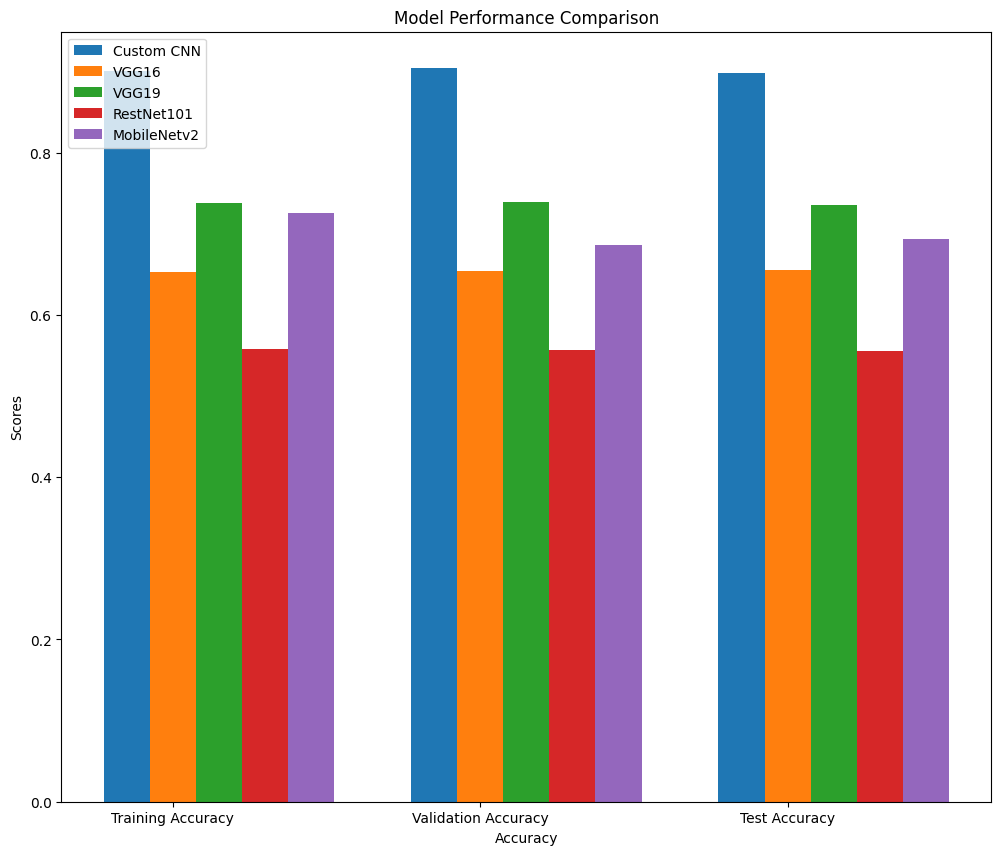

In [116]:
# Set figure size
plt.figure(figsize=(12, 10))

# Define bar width
bar_width = 0.15

# Set X-axis positions
x = np.arange(len(performance))

# Plot bars for each model
plt.bar(x, performance["Custom CNN"], width=bar_width, label="Custom CNN")
plt.bar(x + bar_width, performance['VGG16'], width=bar_width, label="VGG16")
plt.bar(x + 2 * bar_width, performance['VGG19'], width=bar_width, label="VGG19")
plt.bar(x + 3 * bar_width, performance['RestNet101'], width=bar_width, label="RestNet101")
plt.bar(x + 4 * bar_width,performance['Mobile Netv2'],width=bar_width,label = "MobileNetv2")

# Labels & Title
plt.xlabel("Accuracy")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width, performance['Accuracy_Scores'])  # Adjust X-ticks position
plt.legend(loc='upper left')  # Add legend

# Show plot
plt.show()

Based on the Performance we select Custom cnn

In [ ]:
performance[['Accuracy_Scores','Custom CNN']]

,Accuracy_Scores,Custom CNN
0,Training Accuracy,0.891136
1,Validation Accuracy,0.871897
2,Test Accuracy,0.891894


## **Check with New Data**

In [ ]:
import zipfile

with zipfile.ZipFile("new_data.zip", "r") as zip_ref:
    zip_ref.extractall("new_test_data")

In [ ]:
new_test_data=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/new_test_data/new_data',
    shuffle = False,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 8
)

Found 8 files belonging to 4 classes.


In [ ]:
actual_class_names = new_test_data.class_names
actual_class_names

['giloma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
new_test_data = new_test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


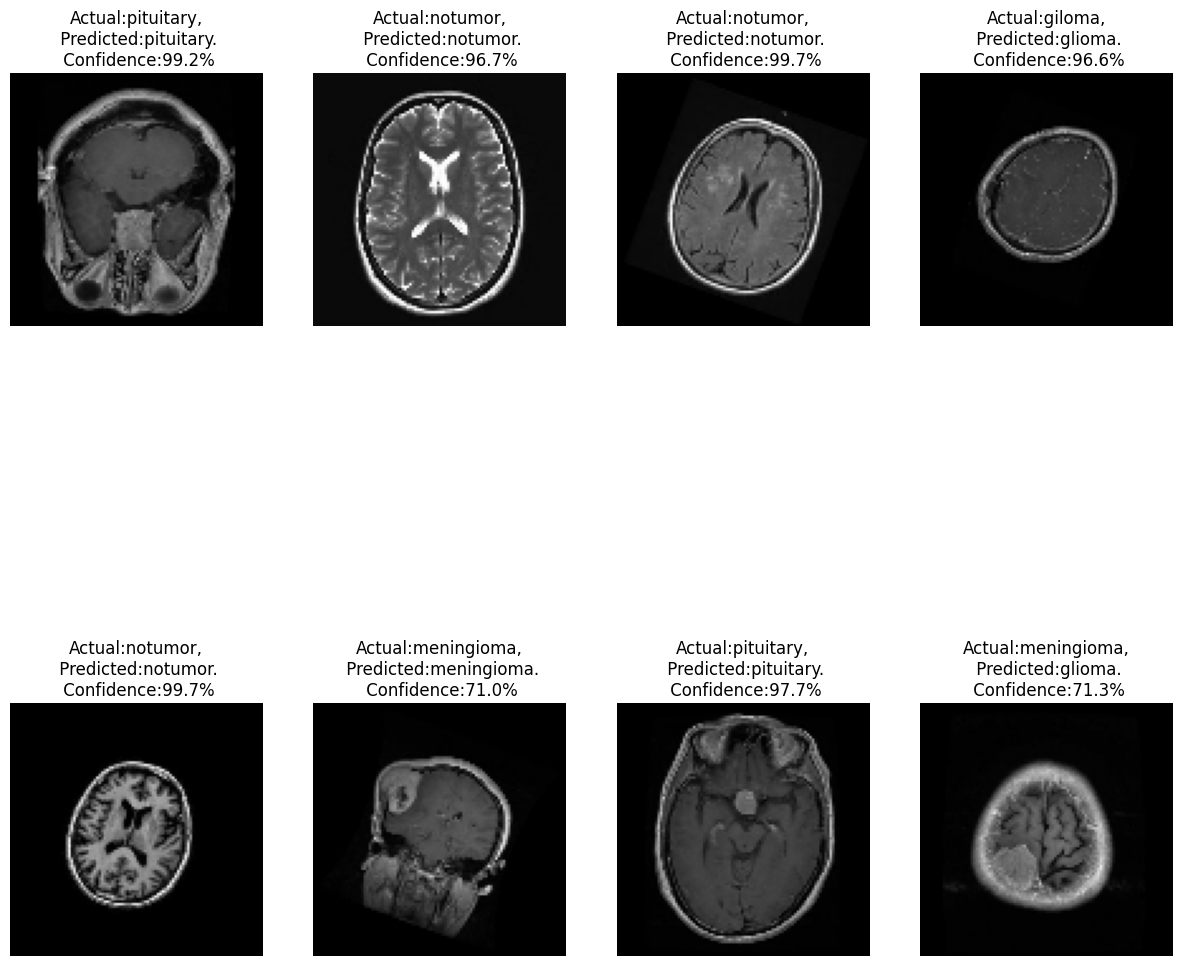

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence = predict(model_fine_cnn,images[i].numpy().astype("uint8"))
    actual_class = actual_class_names[labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence:.3}%")
    plt.axis("off")